In [1]:
#import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#import dataset
data=pd.read_csv('housingData-Real.csv')

In [6]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
#Select your columns
living_space=data['sqft_living']
price=data['price']

In [11]:
price

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1225000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21583     399950.0
21584     380000.0
21585     270000.0
21586     505000.0
21587     385000.0
21588     414500.0
21589     347500.0
21590    1222500.0
21591     572000.0
21592     475000.0
21593    1088000.0
21594     350000.0
21595     520000.0
21596     679950.0
21597    1575000.0
21598     541800.0
21599     810000.0
21600    1537000.0
21601     467000.0
21602     224000.0
21603     507250.0
21604     42

In [20]:
#we convert living_space into 2dimensional array 
X=np.array(living_space).reshape(-1,1)

In [21]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [22]:
#convert price into 2d array
y=np.array(price)

In [23]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [25]:
#CONVERT DATA INTO TEST AND TRAIN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)


In [26]:
X_test

array([[1140],
       [ 740],
       [2660],
       ...,
       [3120],
       [1070],
       [ 970]], dtype=int64)

In [27]:
#pass data into linear regression model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
#first we need to fit training data and then predict it
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#create a predictor 
predictor= regressor.predict(X_test)

In [29]:
predictor

array([280599.711267  , 170085.09502665, 700555.25298031, ...,
       827647.06165671, 261259.65342494, 233630.99936485])

In [30]:
#this prediction is more helpful with graphs


Text(0, 0.5, 'price')

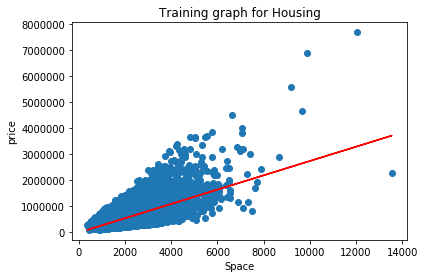

In [35]:
#Plot for training datasets
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title("Training graph for Housing")
plt.xlabel('Space')
plt.ylabel('price')


Text(0, 0.5, 'price')

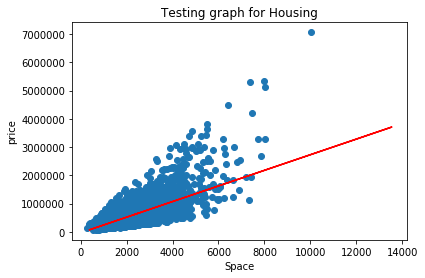

In [36]:
#Plot for testingg datasets
plt.scatter(X_test,y_test)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title("Testing graph for Housing")
plt.xlabel('Space')
plt.ylabel('price')

